In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
df = pd.read_csv('diabetes.csv')

# Filter out the data for non-pregnant individuals
df = df[df['Pregnancies'] == 0]

In [ ]:
# Define bins for each feature (adjusted to include the whole range)
bins = {
    'Glucose': [80, 90, 100, 120, 140, 160, np.inf],
    'BloodPressure': [50, 70, 90, 110, np.inf],
    'SkinThickness': [10, 20, 30, 40, np.inf],
    'Insulin': [100, 200, 300, np.inf],
    'BMI': [20, 40, np.inf],
    'DiabetesPedigreeFunction': [0.2, 0.4, 0.6, np.inf],
    'Age': [20, 30, 40, 50, 60, np.inf]
}

# Apply binning and create categorical variables
for feature, edges in bins.items():
    labels = [f'{edges[i]}-{(">" + str(edges[i + 1]) if np.isinf(edges[i + 1]) else edges[i + 1])}' for i in range(len(edges) - 1)]
    df[feature + '_bin'] = pd.cut(df[feature], bins=edges, labels=labels, include_lowest=True, right=False)

In [ ]:
percentages = {}
for feature in bins.keys():
    grouped = df.groupby(feature + '_bin')['Outcome'].mean() * 100  # Convert proportion to percentage
    percentages[feature] = grouped

<ipython-input-5-07beee7ce179>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=axes[i], palette='viridis')
<ipython-input-5-07beee7ce179>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=axes[i], palette='viridis')
<ipython-input-5-07beee7ce179>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=axes[i], palette='viridis')
<ipython-input-5-07beee7ce179>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

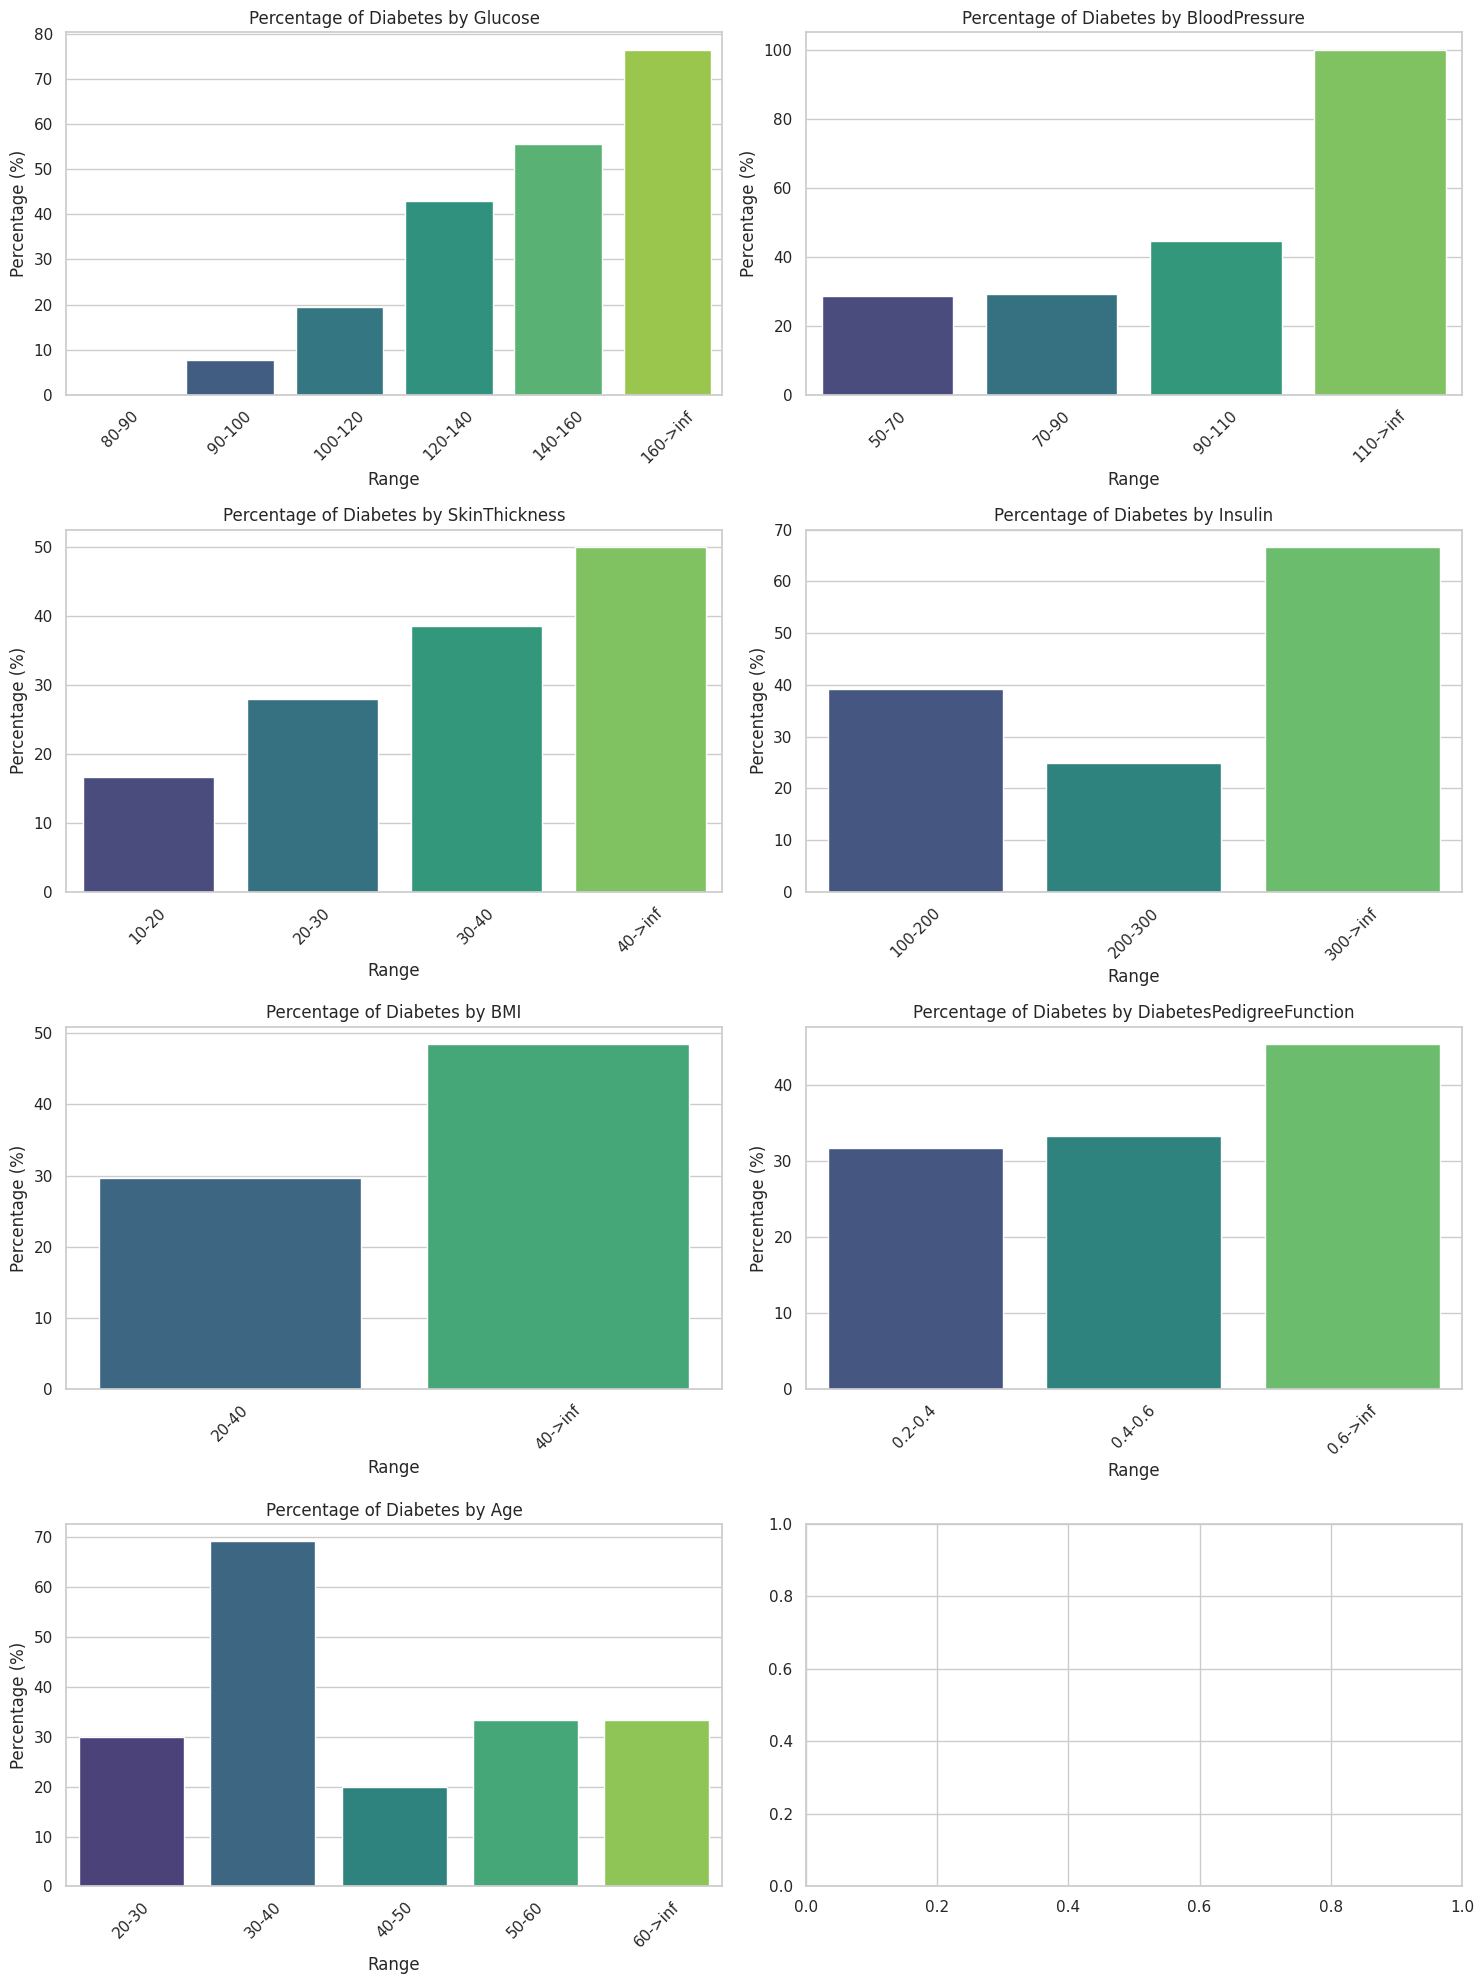

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to contain the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot data
for i, (feature, data) in enumerate(percentages.items()):
    sns.barplot(x=data.index, y=data.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Percentage of Diabetes by {feature}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xlabel('Range')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("diabetes.csv")

# Initialize counts for each condition
counts = {
    "Glucose >= 160": len(data[data["Glucose"] >= 160]),
    "Blood Pressure >= 110": len(data[data["BloodPressure"] >= 110]),
    "Skin Thickness >= 40": len(data[data["SkinThickness"] >= 40]),
    "Insulin >= 300": len(data[data["Insulin"] >= 300]),
    "BMI >= 40": len(data[data["BMI"] >= 40]),
    "DiabetesPedigreeFunction >= 0.6": len(data[data["DiabetesPedigreeFunction"] >= 0.6]),
    "Age between 30 and 40": len(data[(data["Age"] >= 30) & (data["Age"] <= 40)])
}

# Print counts
for condition, count in counts.items():
    print(f"{condition}: {count}")

Glucose >= 160: 102
Blood Pressure >= 110: 5
Skin Thickness >= 40: 90
Insulin >= 300: 38
BMI >= 40: 98
DiabetesPedigreeFunction >= 0.6: 206
Age between 30 and 40: 178


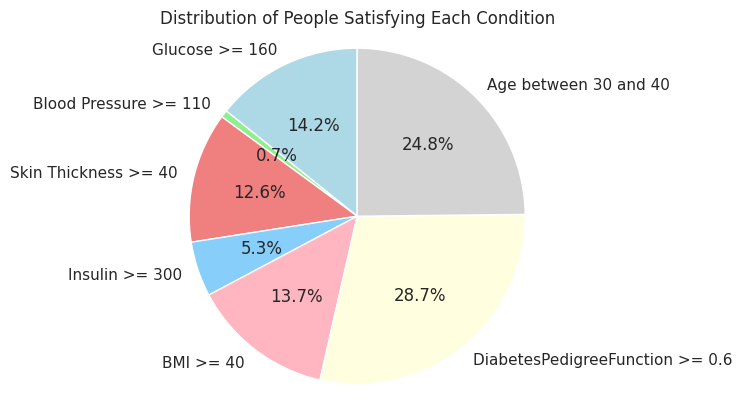

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(counts.keys())
sizes = list(counts.values())
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightyellow', 'lightgrey']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Distribution of People Satisfying Each Condition")
plt.show()